1. Load and merge the datasets keeping all information available for the dates in  which there is a measurement in “fx.csv”

In [67]:
import pandas as pd

fx = pd.read_csv("fx.csv")
speeches = pd.read_csv("speeches.csv", delimiter='|')

In [68]:
# Merge using a left join: all dates from fx, only matching from speeches
merged = pd.merge(fx, speeches, how='left', on='date')

2. Remove entries with obvious outliers or mistakes, if any.

In [69]:
merged['date'] = pd.to_datetime(merged['date'])
merged.set_index('date', inplace= True)

In [70]:
merged.isna().sum()

value          0
speakers    4727
title       4721
subtitle    4722
contents    4840
dtype: int64

In [71]:
merged.describe()

,value
count,7439.000000
mean,1.185567
std,0.154578
min,0.825200
25%,1.084300
50%,1.173800
75%,1.302250
max,1.599000


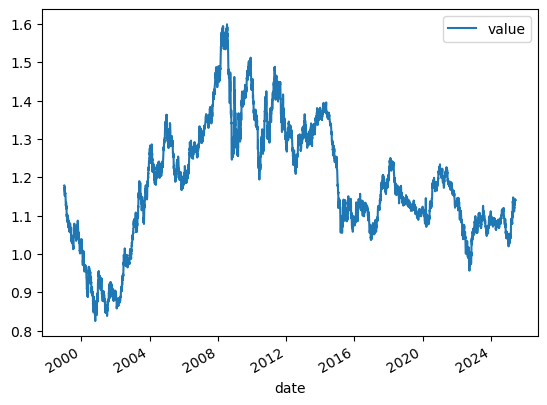

In [72]:
merged.plot();

3. Handle missing observations for the exchange rate, if any. This should be done 
replacing any missing exchange rate with the latest information available. 
Whenever this cannot be done, the relevant entry should be removed entirely
from the dataset.

In [73]:
# There is no missing exchange rate data but note that there are some NaN in the other fields due to mismatch between the two dataset in dates. 

4. Calculate the exchange rate return. Extend the original dataset with the 
following variables: “good_news” (equal to 1 when the exchange rate return is 
larger than 0.5 percent, 0 otherwise) and “bad_news” (equal to 1 when the 
exchange rate return is lower than -0.5 percent, 0 otherwise).

In [74]:
merged['value'] = pd.to_numeric(merged['value'], errors='coerce')
merged['return'] = merged['value'].pct_change()

In [75]:
merged['value'].head(5)

date
1999-01-04    1.1789
1999-01-05    1.1790
1999-01-06    1.1743
1999-01-07    1.1632
1999-01-08    1.1659
Name: value, dtype: float64

In [76]:
merged['return'].head(5)

date
1999-01-04         NaN
1999-01-05    0.000085
1999-01-06   -0.003986
1999-01-07   -0.009452
1999-01-08    0.002321
Name: return, dtype: float64

In [77]:
import numpy as np

merged['good_news'] = np.where(merged['return'] > 0.005, 1, 0)
merged['bad_news'] = np.where(merged['return'] < -0.005, 1, 0)

In [78]:
merged['good_news'].describe()

count    7439.000000
mean        0.146794
std         0.353924
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: good_news, dtype: float64

In [79]:
merged['bad_news'].describe()

count    7439.000000
mean        0.149482
std         0.356587
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: bad_news, dtype: float64

5. Remove the entries for which contents column has NA values. Generate and store in csv the following tables:

   a. “good_indicators” – with the 20 most common words (excluding articles, prepositions and similar connectors) associated with entries wherein 
“good_news” is equal to 1;

    b. “bad_indicators” – with the 20 most common words (excluding articles, prepositions and similar connectors) associated with entries wherein 
“bad_news” is equal to 1;

    Any observation from the common words found above?

In [80]:
merged.dropna(inplace=True)

In [81]:
good_news_df = merged[merged['good_news'] == 1]

In [84]:
good_news_df.head(5)

,value,speakers,title,subtitle,contents,return,good_news,bad_news
date,,,,,,,,
1999-02-09,1.1333,Willem F. Duisenberg,The single European monetary policy,"Speech by Willem F. Duisenberg, <br>President ...",The single European monetary policy Speech...,0.007736,1,0
1999-02-24,1.1037,Tommaso Padoa-Schioppa,EMU and banking supervision,Lecture by Tommaso Padoa-Schioppa Member of th...,EMU and banking supervision Lecture by Tom...,0.006199,1,0
1999-03-08,1.0908,Christian Noyer,First experiences with the euro,"Speech by Christian Noyer, Vice-President of t...",First experiences with the euro Speech by ...,0.006830,1,0
1999-03-10,1.0953,Eugenio Domingo Solans,The euro as a new world currency,"Eugenio Domingo Solans, Member of the Executiv...",The euro as a new world currency Eugenio D...,0.008285,1,0
1999-03-17,1.0966,Tommaso Padoa-Schioppa,The external representation of the euro area,Tommaso Padoa-Schioppa Member of the Executive...,The external representation of the euro area...,0.005963,1,0


In [85]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
import re

nltk.download('stopwords')

languages = ['english', 'french', 'german', 'spanish', 'italian']  # add more as needed

# Combine all stopwords into one set
stop_words = set()
for lang in languages:
    stop_words.update(stopwords.words(lang))

# Combine all text from 'contents' column into one string
all_text = ' '.join(good_news_df['contents'].dropna())

# Lowercase and remove non-alphabetic characters
words = re.findall(r'\b[a-z]+\b', all_text.lower())

# Remove stopwords
filtered_words = [word for word in words if word not in stop_words]

# Count word frequency
word_counts = Counter(filtered_words)

# List the 20 most common words
most_common_20 = word_counts.most_common(20)
print(most_common_20)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsuji\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


[('euro', 5538), ('policy', 5115), ('financial', 4875), ('monetary', 4579), ('area', 3797), ('ecb', 3072), ('economic', 2891), ('inflation', 2847), ('central', 2835), ('market', 2785), ('banks', 2634), ('stability', 2494), ('european', 2302), ('price', 2144), ('bank', 2102), ('would', 2031), ('growth', 1926), ('markets', 1857), ('countries', 1827), ('term', 1767)]


In [89]:
bad_news_df = merged[merged['bad_news'] == 1]

In [90]:
# Combine all text from 'contents' column into one string
all_text = ' '.join(bad_news_df['contents'].dropna())

# Lowercase and remove non-alphabetic characters
words = re.findall(r'\b[a-z]+\b', all_text.lower())

# Remove stopwords
filtered_words = [word for word in words if word not in stop_words]

# Count word frequency
word_counts = Counter(filtered_words)

# List the 20 most common words
most_common_20 = word_counts.most_common(20)
print(most_common_20)

[('euro', 6515), ('financial', 5353), ('policy', 5270), ('monetary', 4828), ('area', 4528), ('banks', 3274), ('central', 3106), ('market', 3085), ('ecb', 3054), ('economic', 2990), ('inflation', 2763), ('stability', 2609), ('european', 2606), ('bank', 2576), ('would', 2490), ('growth', 2282), ('price', 2129), ('countries', 2072), ('term', 1988), ('risk', 1930)]
